In [1]:
%matplotlib inline
import numpy as np
from galaxy_spin_classifier import read_img, ZSClassifier
import matplotlib.pyplot as plt
import torch
from torch import Tensor
from scipy.special import softmax
from prettytable import PrettyTable

zsc = ZSClassifier(device='cpu')
zsc.eval()
print('54-layer CE-ResNet for Z-wise vs S-wise Spiral Classification')

54-layer CE-ResNet for Z-wise vs S-wise Spiral Classification


,Z-wise,S-wise
p_pred,0.967,0.017
p_true,0.953,0.009


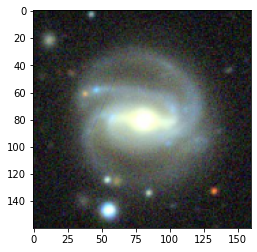

In [2]:
img = read_img('data/163175.jpeg')

with torch.no_grad():
    foo = softmax(zsc(Tensor(img[np.newaxis])), axis=-1)

x = PrettyTable()
x.field_names = ['', 'Z-wise', 'S-wise']
x.add_row(['p_pred', 0.967, 0.017])
x.add_row(['p_true', '{:.3f}'.format(foo[0, 0]), '{:.3f}'.format(foo[0, 1])])
plt.imshow(np.moveaxis(img, 0, -1))
x

,Z-wise,S-wise
p_pred,0.000,0.966
p_true,0.013,0.968


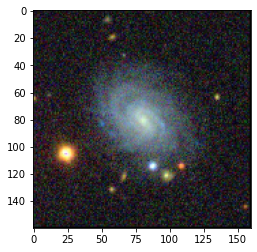

In [3]:
img = read_img('data/158521.jpeg')

with torch.no_grad():
    foo = softmax(zsc(Tensor(img[np.newaxis])), axis=-1)

x = PrettyTable()
x.field_names = ['', 'Z-wise', 'S-wise']
x.add_row(['p_pred', '{:.3f}'.format(0.), '{:.3f}'.format(0.966)])
x.add_row(['p_true', '{:.3f}'.format(foo[0, 0]), '{:.3f}'.format(foo[0, 1])])
plt.imshow(np.moveaxis(img, 0, -1))
x